<a href="https://colab.research.google.com/github/Manos-Mak120/Makrakis-Manos/blob/main/%CE%93%CE%A1%CE%91%CE%A6%CE%97%CE%9C%CE%91%CE%A4%CE%91_ATHENS_VOICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/biden_articles.csv")
biden_articles_df.head()

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/politi...,Μπάιντεν: 100 μέρες επιτυχίας παρά τη διχαστικ...,2021-04-29,14:37:00,Πολιτικη & Οικονομια,Άγης Παπαγεωργίου,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,Παρά το απόλυτα θετικό του έργο σε πολλούς τομ...,Σήμερα ο Τζο Μπάιντεν κλείνει τις πρώτες του ε...,https://www.athensvoice.gr/images/1074x600/3/j...
1,https://www.athensvoice.gr/life/perivallon/712...,Πώς ο Τζο Μπάιντεν θα αντιμετωπίσει την κλιματ...,2021-04-29,09:22:00,Περιβαλλον,Newsroom,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,Πρόγραμμα 3 τρισεκατομμυρίων για τις υποδομές,Όπως είχε υποσχεθεί στην προεκλογική του εκστρ...,https://www.athensvoice.gr/images/1074x600/3/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,DW: Οι 100 ημέρες του Τζο Μπάιντεν στον Λευκό ...,2021-04-29,07:53:00,Κοσμος,Newsroom,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,Πώς «θεσπίστηκε» ο απολογισμός των 100 ημερών,Η συνήθεια να γίνεται απολογισμός των πρώτων 1...,https://www.athensvoice.gr/images/1074x600/3/j...
3,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Δεν επιδιώκουμε κλιμάκωση με τη Ρωσία,2021-04-29,04:26:51,Κοσμος,Newsroom,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,"«Οι ενέργειές τους, ωστόσο, θα έχουν συνέπειες»","Στην ομιλία του ενώπιον του Κογκρέσου, ο Τζο Μ...",https://www.athensvoice.gr/images/1074x600/3/j...
4,https://www.athensvoice.gr/epikairotita/diethn...,Γενοκτονία Αρμενίων: Ψήφισμα κατά Μπάιντεν από...,2021-04-27,16:26:32,Κοσμος,Newsroom,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,«Ο πρόεδρος των ΗΠΑ δεν έχει κανένα νομικό και...,Η τουρκική εθνοσυνέλευση ενέκρινε σήμερα ψήφισ...,https://www.athensvoice.gr/images/1074x600/3/j...


In [ ]:
biden_articles_df['date'] = pd.to_datetime(biden_articles_df['date'])

filtered_articles_df = biden_articles_df[(biden_articles_df['date'] <= '2021-04-30') & (biden_articles_df['date'] >= '2020-11-01')]

filtered_articles_df


,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/politi...,Μπάιντεν: 100 μέρες επιτυχίας παρά τη διχαστικ...,2021-04-29,14:37:00,Πολιτικη & Οικονομια,Άγης Παπαγεωργίου,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,Παρά το απόλυτα θετικό του έργο σε πολλούς τομ...,Σήμερα ο Τζο Μπάιντεν κλείνει τις πρώτες του ε...,https://www.athensvoice.gr/images/1074x600/3/j...
1,https://www.athensvoice.gr/life/perivallon/712...,Πώς ο Τζο Μπάιντεν θα αντιμετωπίσει την κλιματ...,2021-04-29,09:22:00,Περιβαλλον,Newsroom,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,Πρόγραμμα 3 τρισεκατομμυρίων για τις υποδομές,Όπως είχε υποσχεθεί στην προεκλογική του εκστρ...,https://www.athensvoice.gr/images/1074x600/3/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,DW: Οι 100 ημέρες του Τζο Μπάιντεν στον Λευκό ...,2021-04-29,07:53:00,Κοσμος,Newsroom,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,Πώς «θεσπίστηκε» ο απολογισμός των 100 ημερών,Η συνήθεια να γίνεται απολογισμός των πρώτων 1...,https://www.athensvoice.gr/images/1074x600/3/j...
3,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Δεν επιδιώκουμε κλιμάκωση με τη Ρωσία,2021-04-29,04:26:51,Κοσμος,Newsroom,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,"«Οι ενέργειές τους, ωστόσο, θα έχουν συνέπειες»","Στην ομιλία του ενώπιον του Κογκρέσου, ο Τζο Μ...",https://www.athensvoice.gr/images/1074x600/3/j...
4,https://www.athensvoice.gr/epikairotita/diethn...,Γενοκτονία Αρμενίων: Ψήφισμα κατά Μπάιντεν από...,2021-04-27,16:26:32,Κοσμος,Newsroom,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,«Ο πρόεδρος των ΗΠΑ δεν έχει κανένα νομικό και...,Η τουρκική εθνοσυνέλευση ενέκρινε σήμερα ψήφισ...,https://www.athensvoice.gr/images/1074x600/3/j...
...,...,...,...,...,...,...,...,...,...,...
202,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Ο Άντονι Μπλίνκεν επικεφαλής του Στέ...,2020-11-23,18:53:00,Κοσμος,Newsroom,Τζο Μπάιντεν: Ποια είναι τα πρόσωπα που προτεί...,«Χρειάζομαι μια ομάδα που θα είναι έτοιμη από ...,Τα πρώτα πρόσωπα που θα βρεθούν στα υπουργεία ...,https://www.athensvoice.gr/images/1074x600/3/j...
203,https://www.athensvoice.gr/epikairotita/diethn...,Βloomberg: Ο Άντονι Μπλίνκεν θα γίνει ο νέος Υ...,2020-11-23,08:06:00,Κοσμος,Newsroom,Δημοσίευμα του Bloomberg αναφέρει πως ο Τζο Μπ...,Πότε θα το ανακοινώσει ο Μπάιντεν,"Ο εκλεγμένος πρόεδρος των ΗΠΑ, Τζο Μπάιντεν, σ...",https://www.athensvoice.gr/images/1074x600/3/j...
204,https://www.athensvoice.gr/epikairotita/diethn...,Πότε ανακοινώνει ο Τζο Μπάιντεν τα πρώτα μέλη ...,2020-11-22,17:40:00,Κοσμος,Newsroom,"Ο Τζο Μπάιντεν, νέος πρόεδρος των ΗΠΑ, ανακοιν...",Ο νικητής των αμερικανικών εκλογών 2020 έχει υ...,Ο Τζο Μπάιντεν θα ανακοινώσει την Τρίτη 22 Νοε...,https://www.athensvoice.gr/images/1074x600/3/j...
205,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Απίστευτη η ανευθυνότητα του Τραμπ,2020-11-20,06:05:00,Κοσμος,NaN,Τη μη παραδοχή του αποτελέσματος των Αμερικανι...,Ως προς τη μη αναγνώριση της ήττας του στις εκ...,Την «απίστευτη ανευθυνότητα» του Ντόναλντ Τραμ...,https://www.athensvoice.gr/images/1074x600/3/j...


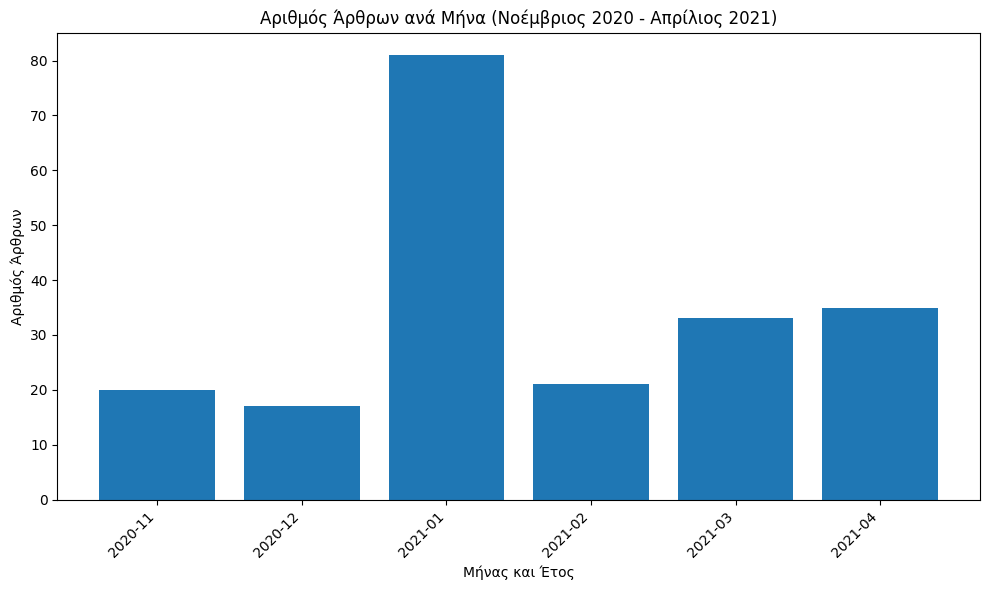

In [ ]:
import matplotlib.pyplot as plt

filtered_articles_df['month_year'] = filtered_articles_df['date'].dt.to_period('M')

monthly_counts = filtered_articles_df['month_year'].value_counts().sort_index()

monthly_counts.index = monthly_counts.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά:
2021-01: 81
2021-04: 35
2021-03: 33
2021-02: 21
2020-11: 20
2020-12: 17


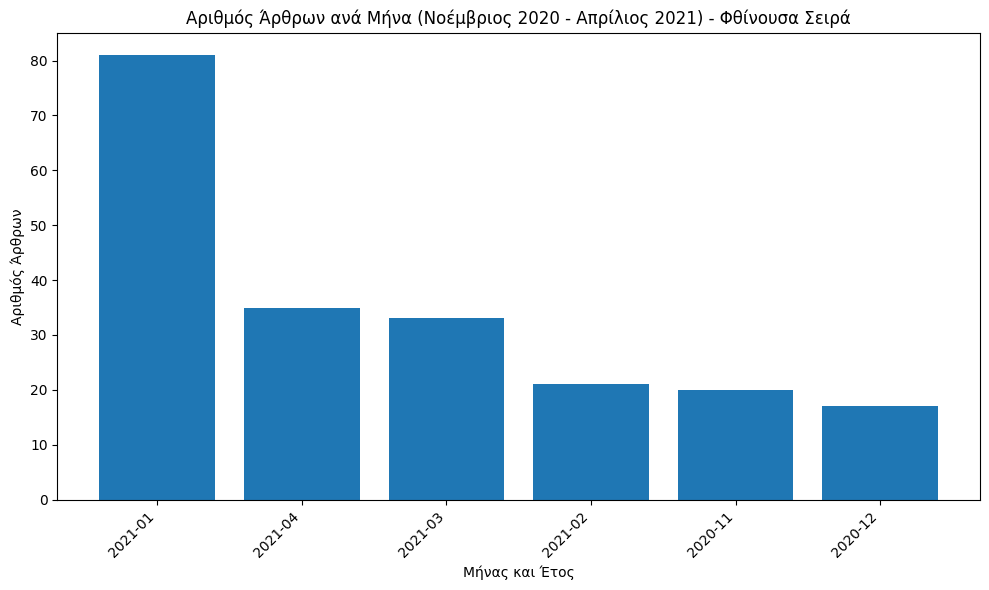

In [ ]:
monthly_counts_desc = filtered_articles_df['month_year'].value_counts().sort_values(ascending=False)

print("Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά:")
for month_year, count in monthly_counts_desc.items():
    print(f"{month_year}: {count}")

monthly_counts_desc.index = monthly_counts_desc.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts_desc.index, monthly_counts_desc.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων ανά Μήνα (Νοέμβριος 2020 - Απρίλιος 2021) - Φθίνουσα Σειρά')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/trump_articles_df_2025.csv")
trump_articles_df.head()

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...
1,https://www.athensvoice.gr/epikairotita/diethn...,Αιχμές Τραμπ προς Κίνα: Τα πάει πολύ άσχημα αυ...,2025-04-30,17:51:57,Κοσμος,Newsroom,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...","«Σε κάποιο σημείο, ελπίζω ότι θα κάνουμε μια σ...","Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",https://www.athensvoice.gr/images/1074x600/1/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,Διαμαρτυρία της Greenpeace στο γήπεδο γκολφ το...,2025-04-30,15:37:53,Κοσμος,Newsroom,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,"«Καιρός για αντίσταση», έγραψαν οι ακτιβιστές ...",Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,https://www.athensvoice.gr/images/1074x600/1/j...
3,https://www.athensvoice.gr/epikairotita/ellada...,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025-04-30,13:46:00,Ελλαδα,Newsroom,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,Πώς θα κινηθούν άλλα μέσα,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",https://www.athensvoice.gr/images/1074x600/jpg...
4,https://www.athensvoice.gr/epikairotita/diethn...,Συρρικνώθηκε η οικονομία των ΗΠΑ στο πρώτο τρί...,2025-04-30,13:43:59,Κοσμος,Newsroom,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",Δασμοί και διεθνείς εντάσεις ρίχνουν την καταν...,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,https://www.athensvoice.gr/images/1074x600/jpg...


In [ ]:
trump_articles_df

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...
1,https://www.athensvoice.gr/epikairotita/diethn...,Αιχμές Τραμπ προς Κίνα: Τα πάει πολύ άσχημα αυ...,2025-04-30,17:51:57,Κοσμος,Newsroom,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...","«Σε κάποιο σημείο, ελπίζω ότι θα κάνουμε μια σ...","Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",https://www.athensvoice.gr/images/1074x600/1/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,Διαμαρτυρία της Greenpeace στο γήπεδο γκολφ το...,2025-04-30,15:37:53,Κοσμος,Newsroom,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,"«Καιρός για αντίσταση», έγραψαν οι ακτιβιστές ...",Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,https://www.athensvoice.gr/images/1074x600/1/j...
3,https://www.athensvoice.gr/epikairotita/ellada...,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025-04-30,13:46:00,Ελλαδα,Newsroom,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,Πώς θα κινηθούν άλλα μέσα,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",https://www.athensvoice.gr/images/1074x600/jpg...
4,https://www.athensvoice.gr/epikairotita/diethn...,Συρρικνώθηκε η οικονομία των ΗΠΑ στο πρώτο τρί...,2025-04-30,13:43:59,Κοσμος,Newsroom,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",Δασμοί και διεθνείς εντάσεις ρίχνουν την καταν...,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,https://www.athensvoice.gr/images/1074x600/jpg...
...,...,...,...,...,...,...,...,...,...,...
773,https://www.athensvoice.gr/epikairotita/diethn...,Ο Ντόναλντ Τραμπ επέλεξε τον Μάθιου Γουίτακερ ...,2024-11-20,17:18:40,Κοσμος,Newsroom,Ο Ντόναλντ Τραμπ επέλεξε τον Μάθιου Γουίτακερ ...,Αναλαμβάνει καίρια θέση σε μια κρίσιμη στιγμή ...,"Ο Ντόναλντ Τραμπ, ο οποίος εξαπέλυε απειλές εν...",https://www.athensvoice.gr/images/1074x600/jpg...
774,https://www.athensvoice.gr/epikairotita/diethn...,"Ο Ντόναλντ Τραμπ επέλεξε τη Λίντα ΜακΜάχον, ως...",2024-11-20,11:19:00,Κοσμος,Newsroom,"Ο Ντόναλντ Τραμπ επέλεξε την Λίντα ΜακΜάχον, ω...",Ποια είναι σύζυγος του μεγιστάνα του WWE Βινς ...,Ο Ντόναλντ Τραμπ επέλεξε τη συνιδρύτρια του Wo...,https://www.athensvoice.gr/images/1074x600/1/j...
775,https://www.athensvoice.gr/epikairotita/diethn...,Βitcoin: Νέο ρεκόρ στα 94.000 δολάρια λόγω Τραμπ,2024-11-20,08:04:42,Κοσμος,Newsroom,Βitcoin: Νέο ρεκόρ στα 94.000 δολάρια λόγω Τρα...,Τι έπαιξε ρόλο στην ανοδική αυτή πορεία,"Πολύ κοντά σε νέο ρεκόρ βρίσκεται το Bitcoin, ...",https://www.athensvoice.gr/images/1074x600/1/j...
776,https://www.athensvoice.gr/epikairotita/diethn...,Reuters: O Πούτιν είναι ανοιχτός σε διαπραγμάτ...,2024-11-20,07:01:00,Κοσμος,Newsroom,Reuters: O Πούτιν είναι ανοιχτός σε διαπραγμάτ...,Σε τι είναι αμετακίνητος ο Ρώσος πρόεδρος,Ο Βλαντιμίρ Πούτιν εμφανίζεται θετικός στο να ...,https://www.athensvoice.gr/images/1074x600/4/j...


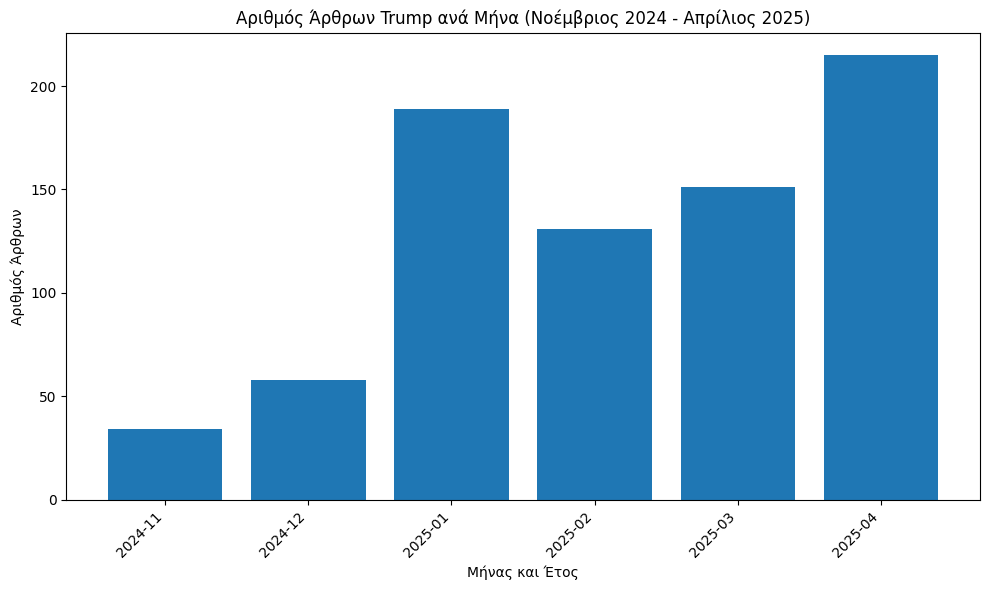

In [ ]:
trump_articles_df['date'] = pd.to_datetime(trump_articles_df['date'])

filtered_trump_articles_df = trump_articles_df[(trump_articles_df['date'] >= '2024-11-20') & (trump_articles_df['date'] <= '2025-04-30')]

filtered_trump_articles_df['month_year'] = filtered_trump_articles_df['date'].dt.to_period('M')

monthly_trump_counts = filtered_trump_articles_df['month_year'].value_counts().sort_index()

monthly_trump_counts.index = monthly_trump_counts.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(monthly_trump_counts.index, monthly_trump_counts.values)
plt.xlabel('Μήνας και Έτος')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Αριθμός Άρθρων Trump ανά Μήνα (Νοέμβριος 2024 - Απρίλιος 2025)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

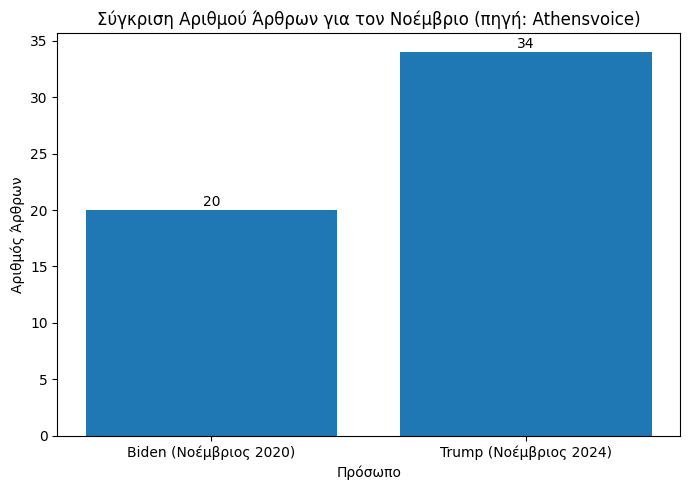

In [ ]:
november_biden_count = filtered_articles_df[filtered_articles_df['month_year'] == '2020-11'].shape[0]
november_trump_count = filtered_trump_articles_df[filtered_trump_articles_df['month_year'] == '2024-11'].shape[0]

november_counts_df = pd.DataFrame({
    'Πρόσωπο': ['Biden (Νοέμβριος 2020)', 'Trump (Νοέμβριος 2024)'],
    'Αριθμός Άρθρων': [november_biden_count, november_trump_count]
})

plt.figure(figsize=(7, 5))
bars = plt.bar(november_counts_df['Πρόσωπο'], november_counts_df['Αριθμός Άρθρων'])
plt.xlabel('Πρόσωπο')
plt.ylabel('Αριθμός Άρθρων')
plt.title('Σύγκριση Αριθμού Άρθρων για τον Νοέμβριο (πηγή: Athensvoice)')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import time
import random

from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trump_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/trump_articles_df_2025.csv")

In [ ]:
biden_21 = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/biden_articles.csv")

         Biden  Trump
Λέξη                 
Ελλάδα      21     59
Τουρκία     19     18
εκλογές     36    115


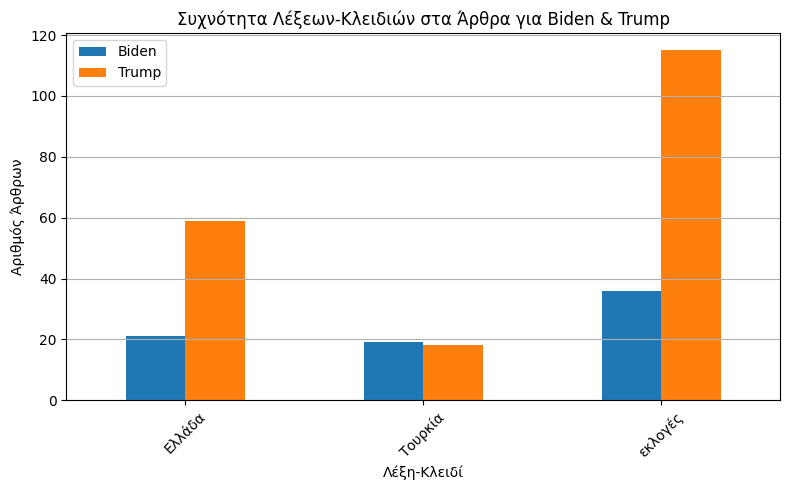

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Φορτώνουμε τα CSV αρχεία
biden_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/biden_articles.csv")
trump_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/trump_articles_df_2025.csv")

# Ορίζουμε τις λέξεις-κλειδιά για αναζήτηση
keywords = ['Ελλάδα', 'Τουρκία' , 'εκλογές']

# Συνάρτηση για καταμέτρηση λέξεων-κλειδιών σε τίτλο και κείμενο
def keyword_stats(df, keywords):
    counts = {}
    for word in keywords:
        mask_title = df['title'].str.contains(word, case=False, na=False)
        mask_body = df['text_body'].str.contains(word, case=False, na=False)
        counts[word] = (mask_title | mask_body).sum()
    return pd.DataFrame.from_dict(counts, orient='index', columns=['Συχνότητα'])

biden_keyword_df = keyword_stats(biden_df, keywords).rename(columns={"Συχνότητα": "Biden"})
trump_keyword_df = keyword_stats(trump_df, keywords).rename(columns={"Συχνότητα": "Trump"})

combined_keywords_df = pd.concat([biden_keyword_df, trump_keyword_df], axis=1)
combined_keywords_df.index.name = "Λέξη"

print(combined_keywords_df)

combined_keywords_df.plot(kind='bar', figsize=(8, 5))
plt.title("Συχνότητα Λέξεων-Κλειδιών στα Άρθρα για Biden & Trump")
plt.ylabel("Αριθμός Άρθρων")
plt.xlabel("Λέξη-Κλειδί")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


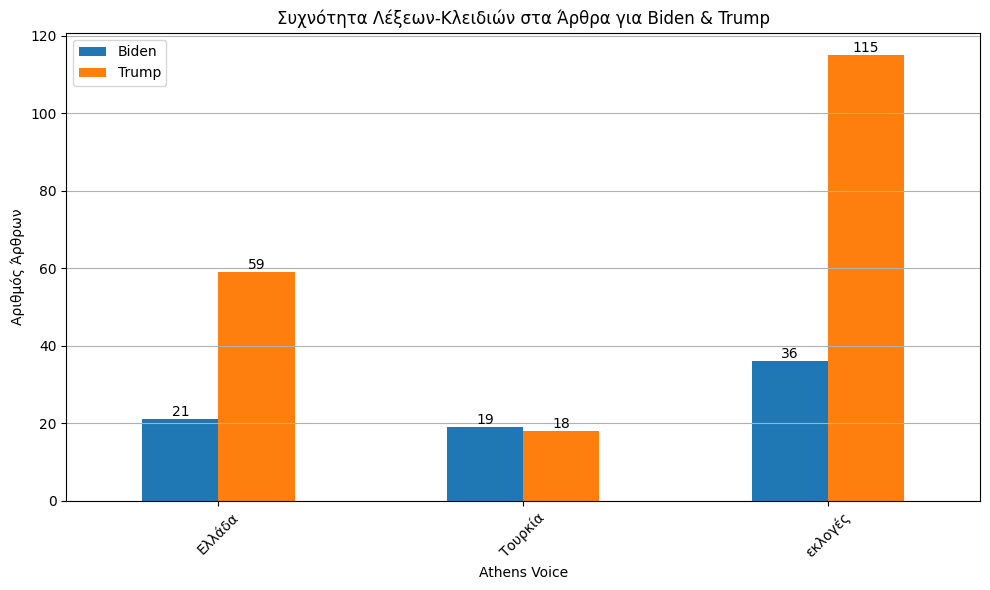

In [ ]:
ax = combined_keywords_df.plot(kind='bar', figsize=(10, 6))
plt.title("Συχνότητα Λέξεων-Κλειδιών στα Άρθρα για Biden & Trump")
plt.ylabel("Αριθμός Άρθρων")
plt.xlabel("Athens Voice")
plt.xticks(rotation=45)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()
